## Description

<pre>
In the dataset, you will find a few hundred stars with 6 types (0 to 5).
The output classes carry the following meaning:

Red Dwarf      0
Brown Dwarf    1
White Dwarf    2
Main Sequence  3
Super Giants   4
Hyper Giants   5
 
In the dataset, you will find some features, like:

Temperature : Average temperature measured in Kelvin. 
L           : Relative luminosity of the star with respect to the sun 
R           : Relative radius of the star with respect to the sun. 
A_M         : Absolute magnitude of the star.
Color (this is a non-numerical feature)
Spectral_Class (this is a non-numerical feature)
</pre>

## Dataset Analysis and Preprocessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
star_dataset = pd.read_csv('dataset_star.csv') 

star_dataset.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


### Question-1

In [3]:
print("Number of Rows :",star_dataset.shape[0])
print("Number of Columns :",star_dataset.shape[1])

Number of Rows : 240
Number of Columns : 7


<pre style="color: brown; font-size: 15px">
=> Number of Training Examples : 240
</pre>

In [4]:
temps = star_dataset['Temperature']
print('Max. Temperature :', temps.max())
print('Min. Temperature :', temps.min())

Max. Temperature : 40000
Min. Temperature : 1939


In [5]:
#just trying to decide on the bin-size
bin_width = 3000
bin_edges = np.arange(0, temps.max() + bin_width, bin_width)

### Question-2

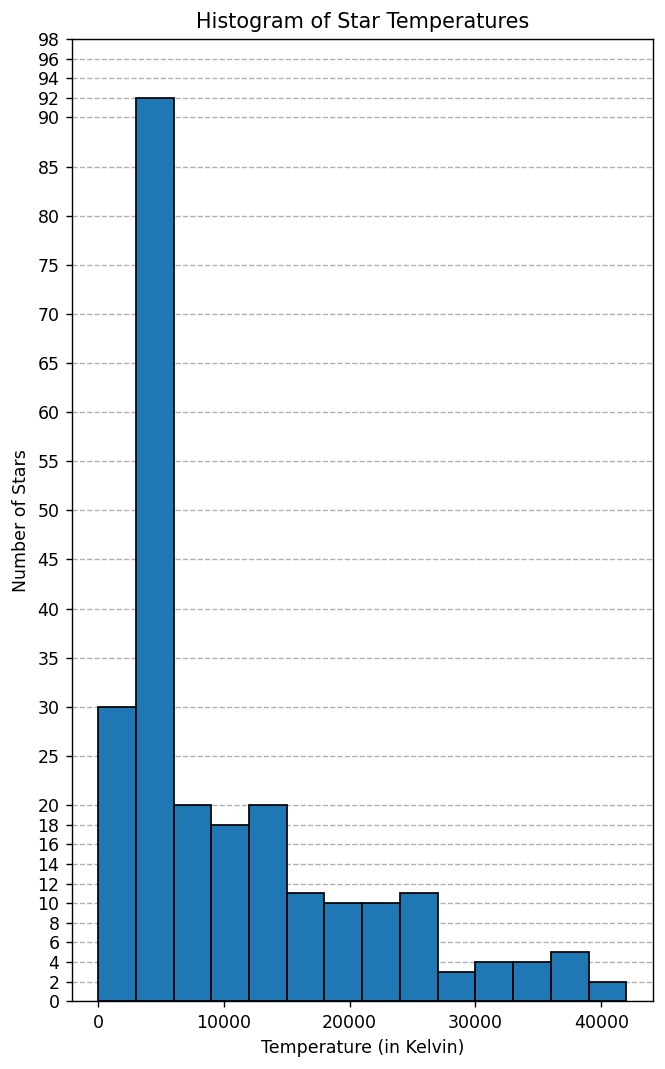

In [6]:
plt.figure(figsize=(6,10),dpi=125)
plt.hist(temps, bins=bin_edges, edgecolor='black', zorder=2) #zorder aligns stuff in z-axis; ⊥ to screen
plt.title('Histogram of Star Temperatures')
plt.xlabel('Temperature (in Kelvin)')
plt.ylabel('Number of Stars')
ticks1 = np.arange(0, 20, 2)
ticks2 = np.arange(20, 90, 5)
ticks3 = np.arange(90, 100, 2)
plt.yticks(np.hstack((ticks1,ticks2,ticks3)))
plt.grid(axis='y',linestyle='--')
plt.show()

<pre style="color: brown; font-size: 15px">
=> There seems to be a lot of stars in the 3000-6000 K temperature range
</pre>

In [7]:
temps_by_type = {
    'Type 0': star_dataset[star_dataset['Type'] == 0]['Temperature'],
    'Type 1': star_dataset[star_dataset['Type'] == 1]['Temperature'],
    'Type 2': star_dataset[star_dataset['Type'] == 2]['Temperature'],
    'Type 3': star_dataset[star_dataset['Type'] == 3]['Temperature'],
    'Type 4': star_dataset[star_dataset['Type'] == 4]['Temperature'],
    'Type 5': star_dataset[star_dataset['Type'] == 5]['Temperature']
}

data = []

for star_type, temps in temps_by_type.items():
    data.append({
        'Star Type': star_type,
        'Min Temperature': temps.min(),
        'Max Temperature': temps.max()
    })

temp_summary = pd.DataFrame(data)

print(temp_summary)

  Star Type  Min Temperature  Max Temperature
0    Type 0             1939             3531
1    Type 1             2621             3692
2    Type 2             7100            25000
3    Type 3             4077            39000
4    Type 4             3008            40000
5    Type 5             3399            38940


<pre style="color: brown; font-size: 15px">
=> Star Types 0 and 1 are only in the low temperature range being below 3700 K
</pre>

In [8]:
temps_type_0 = star_dataset[star_dataset['Type'] == 0]['Temperature']
temps_type_5 = star_dataset[star_dataset['Type'] == 5]['Temperature']

#just trying to decide on the bin-size
bin_width = 3000
bin_edges = np.arange(0, temps.max() + bin_width, bin_width)

### Question-3

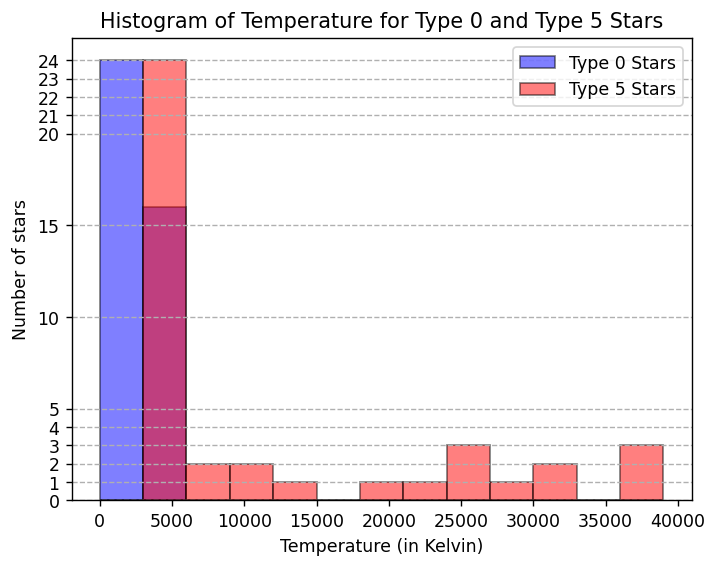

In [9]:
plt.figure(dpi=125)

plt.hist(temps_type_0, bins=bin_edges, color='blue', edgecolor='black', alpha=0.5, label='Type 0 Stars')

plt.hist(temps_type_5, bins=bin_edges, color='red', edgecolor='black', alpha=0.5, label='Type 5 Stars')

plt.title('Histogram of Temperature for Type 0 and Type 5 Stars')
plt.xlabel('Temperature (in Kelvin)')
plt.ylabel('Number of stars')
ticks1 = np.arange(0, 5, 1)
ticks2 = np.arange(5, 20, 5)
ticks3 = np.arange(20, 25, 1)
plt.yticks(np.hstack((ticks1,ticks2,ticks3)))
plt.legend()
plt.grid(axis='y', linestyle='--')
plt.show()

<pre style="color: brown; font-size: 15px">
=> Star Types 0 and 1 are only in the low temperature range being below 3700 K
</pre>

### Question-4

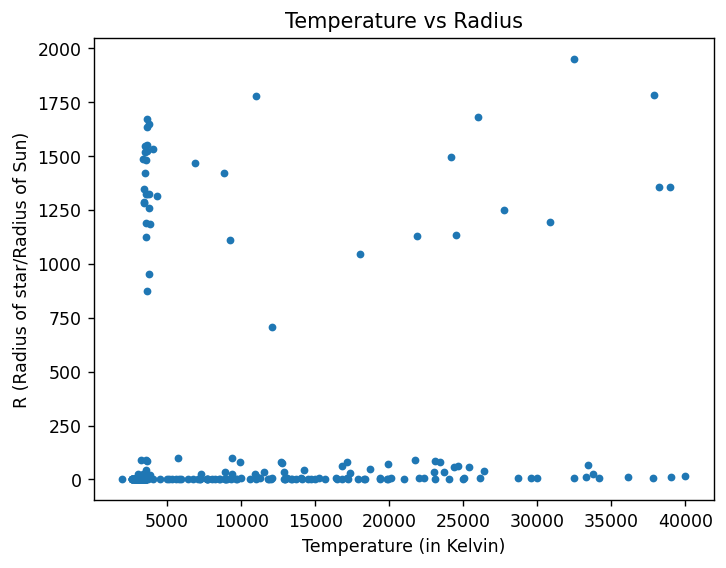

In [10]:
radii = star_dataset['R']
temps = star_dataset['Temperature']

plt.figure(dpi=125)
plt.scatter(temps, radii, s=12)
plt.title('Temperature vs Radius')
plt.xlabel('Temperature (in Kelvin)')
plt.ylabel('R (Radius of star/Radius of Sun)')
plt.show()

### Question-5

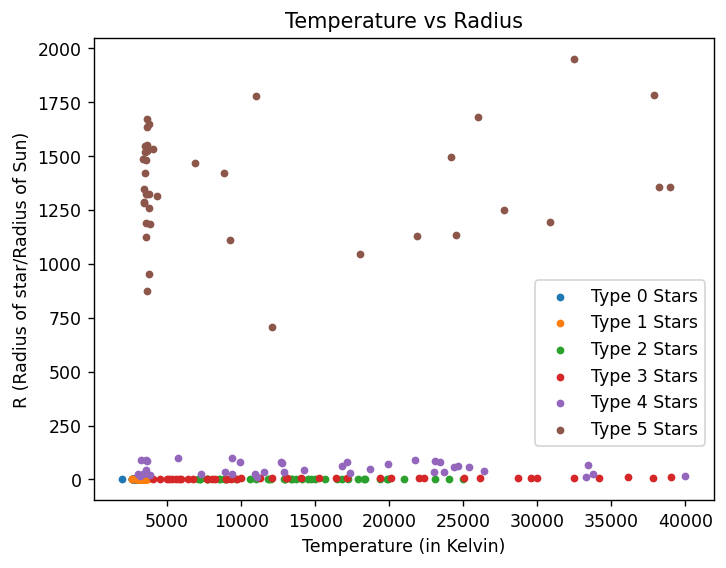

In [11]:
plt.figure(dpi=125)
for i in range(6):
    plt.scatter(star_dataset['Temperature'][star_dataset['Type'] == i],\
                star_dataset['R'][star_dataset['Type'] == i],\
                s=12, label=f'Type {i} Stars')
plt.title('Temperature vs Radius')
plt.xlabel('Temperature (in Kelvin)')
plt.ylabel('R (Radius of star/Radius of Sun)')
plt.legend(loc='lower right', bbox_to_anchor=(1, 0.1))
plt.show()

<pre style="color: brown; font-size: 15px">
=> Star Type 5's radius seems to be well above 600 compared to the other stars
</pre>

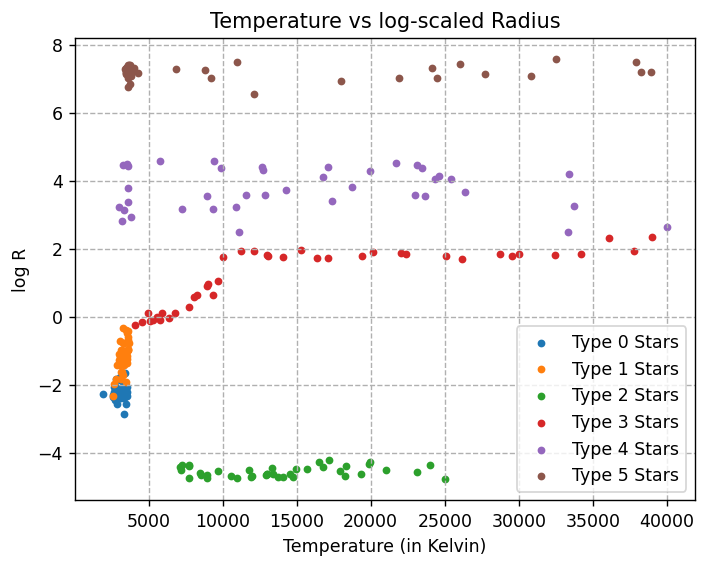

In [12]:
plt.figure(dpi=125)
for i in range(6):
    plt.scatter(star_dataset['Temperature'][star_dataset['Type'] == i],\
                np.log(star_dataset['R'][star_dataset['Type'] == i]),\
                s=12, label=f'Type {i} Stars')
plt.title('Temperature vs log-scaled Radius')
plt.xlabel('Temperature (in Kelvin)')
plt.ylabel('log R')
plt.legend()
plt.grid(linestyle='--')
plt.show()

<pre style="color: brown; font-size: 15px">
=> After taking a log-scale for the radii of stars, we can almost differentiate between all types of stars
   except,Type 0 and 1 stars where overlap occurs significantly.
</pre>

### Question-6

In [13]:
print('Color classes :',star_dataset['Color'].unique(), len(star_dataset['Color'].unique()))
print('Spectral Classes :',star_dataset['Spectral_Class'].unique(),len(star_dataset['Spectral_Class'].unique()))

Color classes : ['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White'] 17
Spectral Classes : ['M' 'B' 'A' 'F' 'O' 'K' 'G'] 7


<pre style="color: brown; font-size: 13px">
We need to combine classes like 'White' and 'white'
                                'Blue White' and 'Blue white' and 'Blue-white', etc...
</pr>

In [14]:
colors = []
for color in star_dataset['Color']:
    if color in ['Red']:
        colors.append(0)
    elif color in ['Blue White','Blue white','Blue-white','Blue-White']:
        colors.append(1)
    elif color in ['White','white']:
        colors.append(2)
    elif color in ['Yellowish White']:
        colors.append(3)
    elif color in ['Pale yellow orange']:
        colors.append(4)
    elif color in ['Blue']:
        colors.append(5)
    elif color in ['Whitish']:
        colors.append(6)
    elif color in ['yellow-white']:
        colors.append(7)
    elif color in ['Orange']:
        colors.append(8)
    elif color in ['White-Yellow']:
        colors.append(9)
    elif color in ['yellowish','Yellowish']:
        colors.append(10)
    elif color in ['Orange-Red']:
        colors.append(11)
        
#12 unique Colors

spectrals = []
for spectral in star_dataset['Spectral_Class']:
    if spectral == 'M':
        spectrals.append(0)
    elif spectral == 'B':
        spectrals.append(1)
    elif spectral == 'A':
        spectrals.append(2)
    elif spectral == 'F':
        spectrals.append(3)
    elif spectral == 'O':
        spectrals.append(4)
    elif spectral == 'K':
        spectrals.append(5)
    elif spectral == 'G':
        spectrals.append(6)
        
#7 unique Spectrals

print(len(colors), len(spectrals))

240 240


In [15]:
star_dataset_processed = star_dataset.copy()

star_dataset_processed.drop(['Color','Spectral_Class'], axis=1, inplace=True)

star_dataset_processed['Color'] = colors
star_dataset_processed['Spectral_Class'] = spectrals

# One-hot encoding the 'Color' column
df_expanded = pd.get_dummies(star_dataset_processed['Color'], prefix='Color')

# Merge the one-hot encoded columns with the original DataFrame
star_dataset_processed = pd.concat([star_dataset_processed, df_expanded], axis=1)

# One-hot encoding the 'Spectral_Class' column
df_expanded = pd.get_dummies(star_dataset_processed['Spectral_Class'], prefix='Spectral_Class')

# Merge the one-hot encoded columns with the original DataFrame
star_dataset_processed = pd.concat([star_dataset_processed, df_expanded], axis=1)

star_dataset_processed.tail(5)

,Temperature,L,R,A_M,Type,Color,Spectral_Class,Color_0,Color_1,Color_2,...,Color_9,Color_10,Color_11,Spectral_Class_0,Spectral_Class_1,Spectral_Class_2,Spectral_Class_3,Spectral_Class_4,Spectral_Class_5,Spectral_Class_6
235,38940,374830.0,1356.0,-9.93,5,5,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False
236,30839,834042.0,1194.0,-10.63,5,5,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False
237,8829,537493.0,1423.0,-10.73,5,2,2,False,False,True,...,False,False,False,False,False,True,False,False,False,False
238,9235,404940.0,1112.0,-11.23,5,2,2,False,False,True,...,False,False,False,False,False,True,False,False,False,False
239,37882,294903.0,1783.0,-7.80,5,5,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### Extra visualization

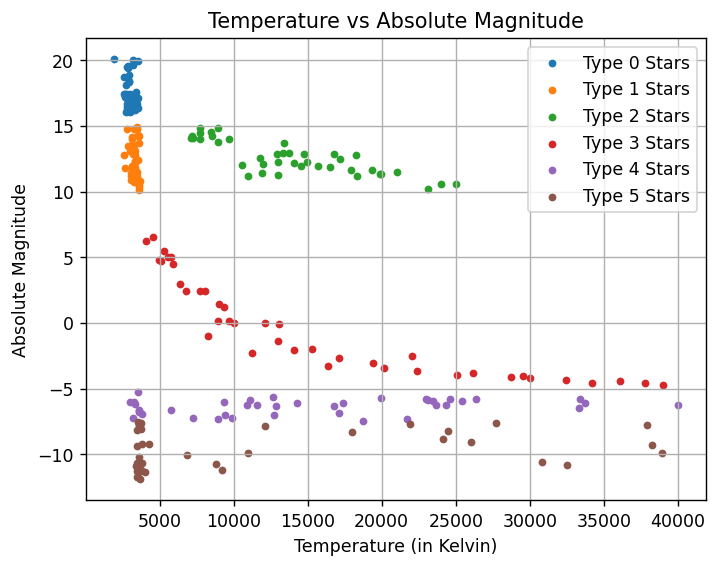

In [16]:
plt.figure(dpi=125)
for i in range(6):
    plt.scatter(star_dataset['Temperature'][star_dataset['Type'] == i],\
                star_dataset['A_M'][star_dataset['Type'] == i],\
                s=12, label=f'Type {i} Stars')
plt.title('Temperature vs Absolute Magnitude')
plt.xlabel('Temperature (in Kelvin)')
plt.ylabel('Absolute Magnitude')
plt.legend()
plt.grid()
plt.show()

<pre style="color: brown; font-size: 15px">
=> With A_M of stars, we can almost differentiate between all types of stars
   except,Type 4 and 5 stars where overlap occurs significantly.
</pre>

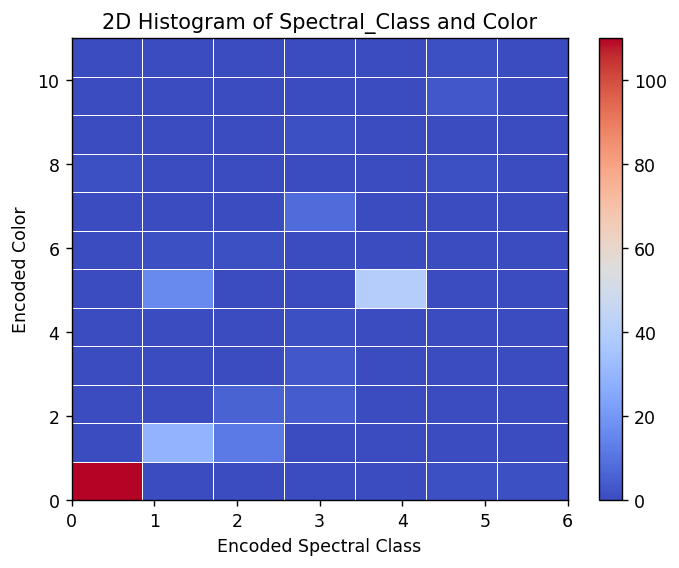

In [17]:
plt.figure(dpi=125)
plt.hist2d(star_dataset_processed['Spectral_Class'], star_dataset_processed['Color'],\
          bins=[len(star_dataset_processed['Spectral_Class'].unique()),len(star_dataset_processed['Color'].unique())],\
          edgecolor='white', linewidth=0.5, cmap='coolwarm')
plt.title('2D Histogram of Spectral_Class and Color')
plt.xlabel('Encoded Spectral Class')
plt.ylabel('Encoded Color')
plt.colorbar()
plt.show()

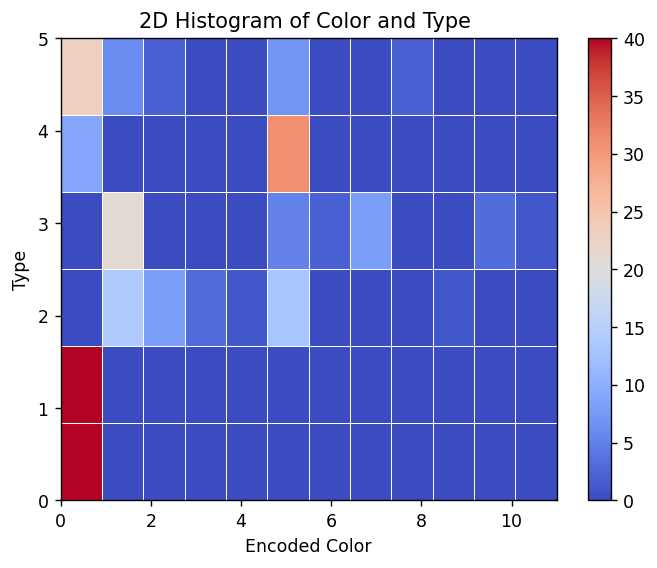

In [18]:
plt.figure(dpi=125)
plt.hist2d(star_dataset_processed['Color'], star_dataset_processed['Type'],\
           bins=[len(star_dataset_processed['Color'].unique()),len(star_dataset_processed['Type'].unique())],\
          edgecolor='white', linewidth=0.5, cmap='coolwarm')
plt.title('2D Histogram of Color and Type ')
plt.xlabel('Encoded Color')
plt.ylabel('Type')
plt.colorbar()
plt.show()

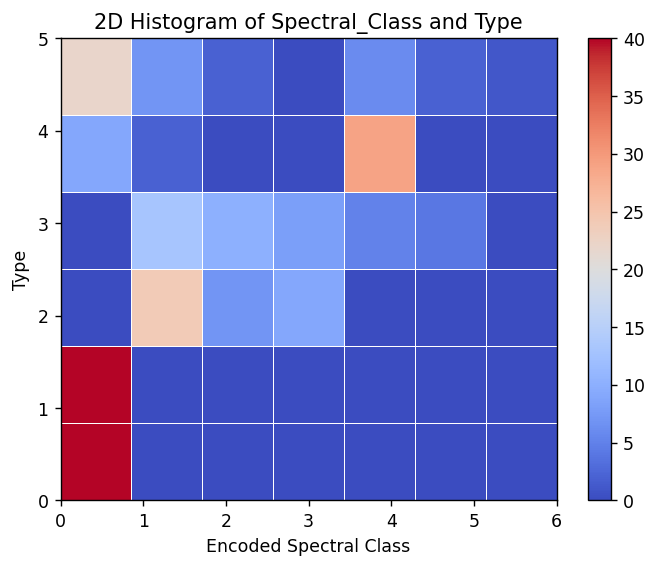

In [19]:
plt.figure(dpi=125)
plt.hist2d(star_dataset_processed['Spectral_Class'], star_dataset_processed['Type'],\
          bins=[len(star_dataset_processed['Spectral_Class'].unique()),len(star_dataset_processed['Type'].unique())],\
          edgecolor='white', linewidth=0.5, cmap='coolwarm')
plt.title('2D Histogram of Spectral_Class and Type')
plt.xlabel('Encoded Spectral Class')
plt.ylabel('Type')
plt.colorbar()
plt.show()

## Model creation and Training

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

### Question-7 and Question 6's preprocessing part

In [21]:
# log-scaled R is used as a feature

star_dataset_processed['R'] = np.log(star_dataset['R']) #Question 6's preprocessing part
star_dataset_processed.tail(5)

,Temperature,L,R,A_M,Type,Color,Spectral_Class,Color_0,Color_1,Color_2,...,Color_9,Color_10,Color_11,Spectral_Class_0,Spectral_Class_1,Spectral_Class_2,Spectral_Class_3,Spectral_Class_4,Spectral_Class_5,Spectral_Class_6
235,38940,374830.0,7.212294,-9.93,5,5,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False
236,30839,834042.0,7.085064,-10.63,5,5,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False
237,8829,537493.0,7.260523,-10.73,5,2,2,False,False,True,...,False,False,False,False,False,True,False,False,False,False
238,9235,404940.0,7.013915,-11.23,5,2,2,False,False,True,...,False,False,False,False,False,True,False,False,False,False
239,37882,294903.0,7.486053,-7.80,5,5,4,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [22]:
X = star_dataset_processed.drop(columns=['Type','Color','Spectral_Class'])  #features
y = star_dataset_processed['Type']               #class

#Question-7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = ['Temperature', 'L', 'R', 'A_M']
categorical_features = []
for i in range(12):
    categorical_features.append(f'Color_{i}')

for i in range(7):
    categorical_features.append(f'Spectral_Class_{i}')

#Question 6's preprocessing part
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', 'passthrough', categorical_features)  #no scaling for categorical features
    ])

X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

In [23]:
X.head()

,Temperature,L,R,A_M,Color_0,Color_1,Color_2,Color_3,Color_4,Color_5,...,Color_9,Color_10,Color_11,Spectral_Class_0,Spectral_Class_1,Spectral_Class_2,Spectral_Class_3,Spectral_Class_4,Spectral_Class_5,Spectral_Class_6
0,3068,0.002400,-1.771957,16.12,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,3042,0.000500,-1.869505,16.60,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2600,0.000300,-2.282782,18.70,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,2800,0.000200,-1.832581,16.65,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,1939,0.000138,-2.273026,20.06,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


### Question-8,9,10 and recall metric for Question-15

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K

In [25]:
# Question-15's recall metric
def my_recall(y_true, y_pred):
    y_true = K.argmax(y_true, axis=-1)
    y_pred = K.argmax(y_pred, axis=-1)
    
    #calculating true positives and false negatives for each class
    true_positives = K.sum(K.cast(K.equal(y_true, y_pred), dtype=K.floatx()), axis=0)
    false_negatives = K.sum(K.cast(K.equal(y_true, 1) & K.not_equal(y_pred, 1), dtype=K.floatx()), axis=0)

    #calculating recall for each class
    recall = true_positives / (true_positives + false_negatives)
    
    #taking their mean
    return K.mean(recall)

# Question-8
def my_model(input_dim, num_classes):
    
    model = Sequential()
    model.add(Dense(6, input_dim=input_dim, activation='relu'))
    model.add(Dense(6, activation='relu'))
    model.add(Dense(num_classes, activation='softmax')) # Question-10
    
    model.compile(optimizer=Adam(),
                  loss='categorical_crossentropy',  # Question-10
                  metrics=['accuracy',my_recall])   # adding recall metric also for Question-15
    
    return model

y_one_hot_train = to_categorical(y_train)
y_one_hot_test = to_categorical(y_test)

input_dim = X_train_scaled.shape[1]
num_classes = y_one_hot_train.shape[1]

model = my_model(input_dim, num_classes)

# Question-9
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 144       
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________


<pre style="color: brown; font-size: 15px">
=> Total number of parameters : 228 = (23*6 + 6) + (6*6 + 6) + (6*6 + 6)
    No. of features is 23 after one-hot encoding color and spectral_class features
</pre>

In [26]:
model = my_model(input_dim, num_classes)
history = model.fit(X_train_scaled, y_one_hot_train, epochs=700)

Epoch 1/700


2024-09-12 12:00:39.839407: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 0s 2ms/step - loss: 1.8175 - accuracy: 0.1302 - my_recall: 0.4356
Epoch 2/700
6/6 [==============================] - 0s 928us/step - loss: 1.8005 - accuracy: 0.1198 - my_recall: 0.4144
Epoch 3/700
6/6 [==============================] - 0s 938us/step - loss: 1.7874 - accuracy: 0.0938 - my_recall: 0.3667
Epoch 4/700
6/6 [==============================] - 0s 954us/step - loss: 1.7757 - accuracy: 0.0781 - my_recall: 0.2976
Epoch 5/700
6/6 [==============================] - 0s 937us/step - loss: 1.7645 - accuracy: 0.1042 - my_recall: 0.4300
Epoch 6/700
6/6 [==============================] - 0s 873us/step - loss: 1.7550 - accuracy: 0.1406 - my_recall: 0.4448
Epoch 7/700
6/6 [==============================] - 0s 866us/step - loss: 1.7458 - accuracy: 0.1562 - my_recall: 0.4712
Epoch 8/700
6/6 [==============================] - 0s 848us/step - loss: 1.7364 - accuracy: 0.2083 - my_recall: 0.5575
Epoch 9/700
6/6 [==============================] - 0s 916us/st

## Testing and Evaluation

### Question-11

In [27]:
y_pred = model.predict(X_test_scaled)

2/2 [==============================] - 0s 1ms/step


### Question-12

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

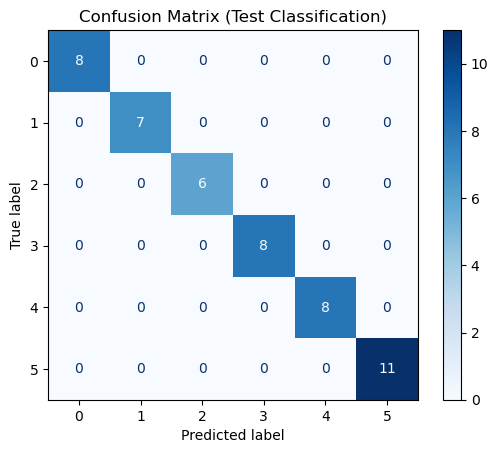

In [29]:
y_pred_classes = y_pred.argmax(axis=-1)
y_true_classes = y_one_hot_test.argmax(axis=-1)

cm = confusion_matrix(y_true_classes, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix (Test Classification)')
plt.show()

### Question-13

In [30]:
test_count = 0
for i in range(len(y_test)):
    if y_true_classes[i] == y_pred_classes[i]:
        test_count += 1
    
print("Accuracy on test data :",test_count/len(y_test))

Accuracy on test data : 1.0


<pre style="color: brown; font-size: 15px">
=> Our train accuracy is 1.0 and test accuracy is 1.0
</pre>

### Question-14

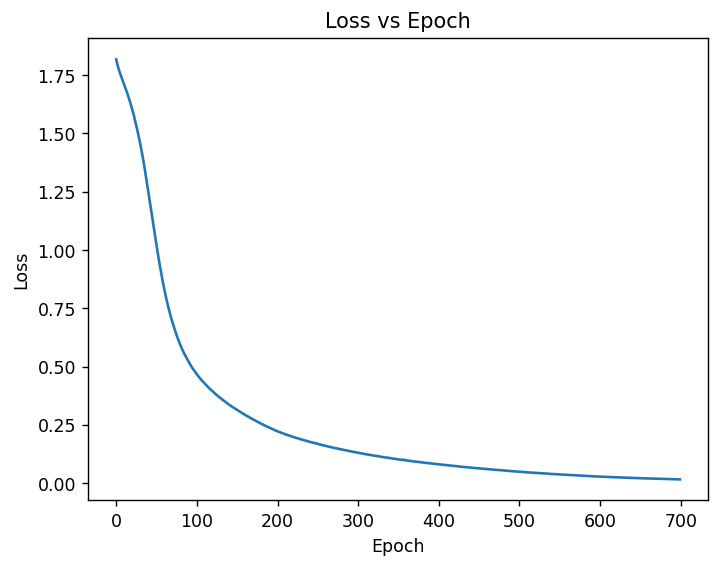

In [31]:
plt.figure(dpi=125)
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

### Question-15

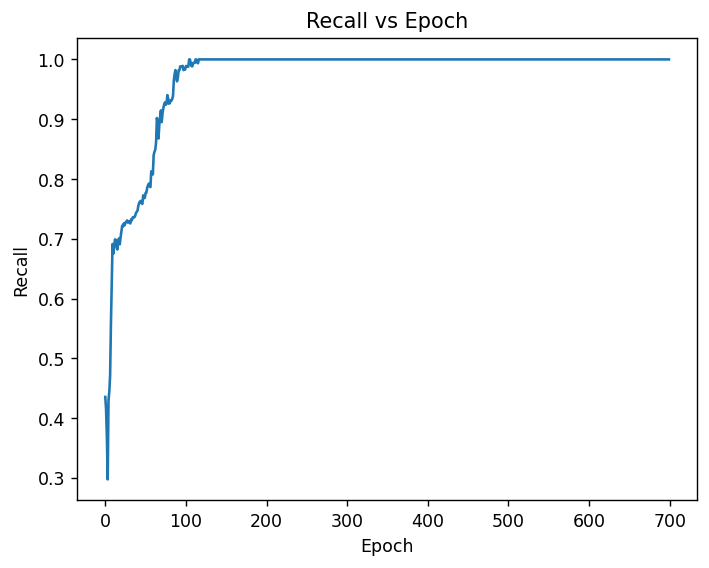

In [32]:
plt.figure(dpi=125)
plt.plot(history.history['my_recall'])
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Recall vs Epoch')
plt.show()

### Observation:

<pre font-size: 15px">
    
It seems that log R and Absolute Magnitude are enough as features to identify the type of star.

I noticed that <b>without</b> Color and Spectral Class, training took only 400 steps unlike 700 steps (when they are used) to get 100% accuracy on both training and testing data.

We can notice that log R can differentiate everything except  Type 0 and 1;
and Absolute Magnitude can differentiate everything except  Type 4 and 5;
so together they can essentially be used to classify any star.

But this goes true only for the given dataset. There may be some stars not provided in the given dataset, which might need Color or Spectral_Class information to be distinguished from each other.
</pre>